In [5]:
# from datasets import load_dataset

# dataset = load_dataset("allenai/ai2_arc", "ARC-Easy")
# dataset["train"][0]

{'id': 'Mercury_7220990',
 'question': 'Which factor will most likely cause a person to develop a fever?',
 'choices': {'text': ['a leg muscle relaxing after exercise',
   'a bacterial population in the bloodstream',
   'several viral particles on the skin',
   'carbohydrates being digested in the stomach'],
  'label': ['A', 'B', 'C', 'D']},
 'answerKey': 'B'}

In [7]:
# # print names of files in directory "LogicBench/LogicBench(Eval)"
# import os
# path = "LogicBench/LogicBench(Eval)"
# files = os.listdir(path)
# files


['BQA', 'MCQA', 'Readme.md']

[('step0', 0.24326599326599327), ('step0', 0.24326599326599327), ('step0', 0.24326599326599327), ('step0', 0.24326599326599327), ('step0', 0.24326599326599327), ('step1', 0.24326599326599327), ('step2', 0.24326599326599327), ('step4', 0.24368686868686867), ('step8', 0.24537037037037038), ('step16', 0.24284511784511784), ('step32', 0.2542087542087542), ('step64', 0.25042087542087543), ('step128', 0.2537878787878788), ('step256', 0.2668350168350168), ('step512', 0.2718855218855219), ('step1000', 0.2748316498316498), ('step2000', 0.29924242424242425), ('step3000', 0.30387205387205385), ('step4000', 0.3143939393939394), ('step5000', 0.3228114478114478), ('step6000', 0.3148148148148148), ('step7000', 0.31776094276094274)]
[('step0', 0.24326599326599327), ('step1', 0.24326599326599327), ('step2', 0.24326599326599327), ('step4', 0.24368686868686867), ('step8', 0.24537037037037038), ('step16', 0.24284511784511784), ('step32', 0.2542087542087542), ('step64', 0.25042087542087543), ('step128', 0.

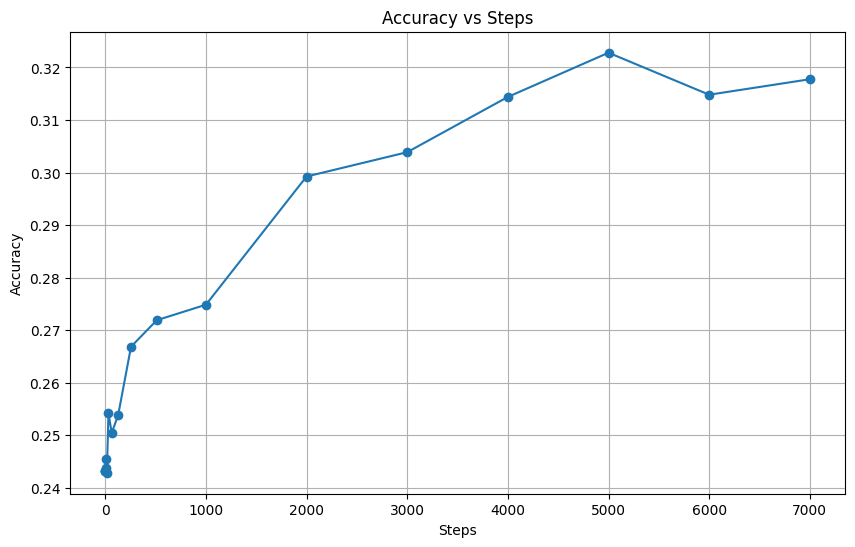

In [9]:
import os
import json

# Directory containing the JSON files
directory = "output/pythia_arc/EleutherAI__pythia-14m"

# List all files in the directory
files = os.listdir(directory)

# Filter out only JSON files
json_files = [file for file in files if file.endswith('.json')]

scores = []
steps = []

for json_file in json_files:
    with open(os.path.join(directory, json_file), 'r') as f:
        data = json.load(f)
        step = data["config"]["model_revision"]
        steps.append(step)
        accuracy = data["results"]["arc_easy"]["acc,none"]
        scores.append(accuracy)
sorted_steps_scores = sorted(zip(steps, scores), key=lambda x: int(x[0][4:]))
print(sorted_steps_scores)
# Deduplicate steps and scores
unique_steps_scores = {}
for step, score in sorted_steps_scores:
    if step not in unique_steps_scores:
        unique_steps_scores[step] = score

# Convert back to sorted list of tuples
deduplicated_sorted_steps_scores = sorted(unique_steps_scores.items(), key=lambda x: int(x[0][4:]))
print(deduplicated_sorted_steps_scores)

import matplotlib.pyplot as plt

# Extract steps and scores for plotting
steps = [int(step[4:]) for step, score in deduplicated_sorted_steps_scores]
scores = [score for step, score in deduplicated_sorted_steps_scores]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(steps, scores, marker='o')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Steps')
plt.grid(True)

# Save the plot to a PDF file
plt.savefig('accuracy_vs_steps.pdf')
plt.show()